In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')  # setting up background
from scipy import stats

# TO avoid warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_Data.xls')
pd.set_option('display.max_columns',None) # Used to display the all features
data.head() # Get first 5 rows

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


UNIVARIATE ANALYSIS
PLOTS USED:

continuous features

histogram: A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis. The vertical y-axis represents the number count or percentage of occurrences in the data for each column.

lineplots:A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

Discrete and Categorical

Countplot: countplot is used to Show the counts of observations in each categorical bin using bars.

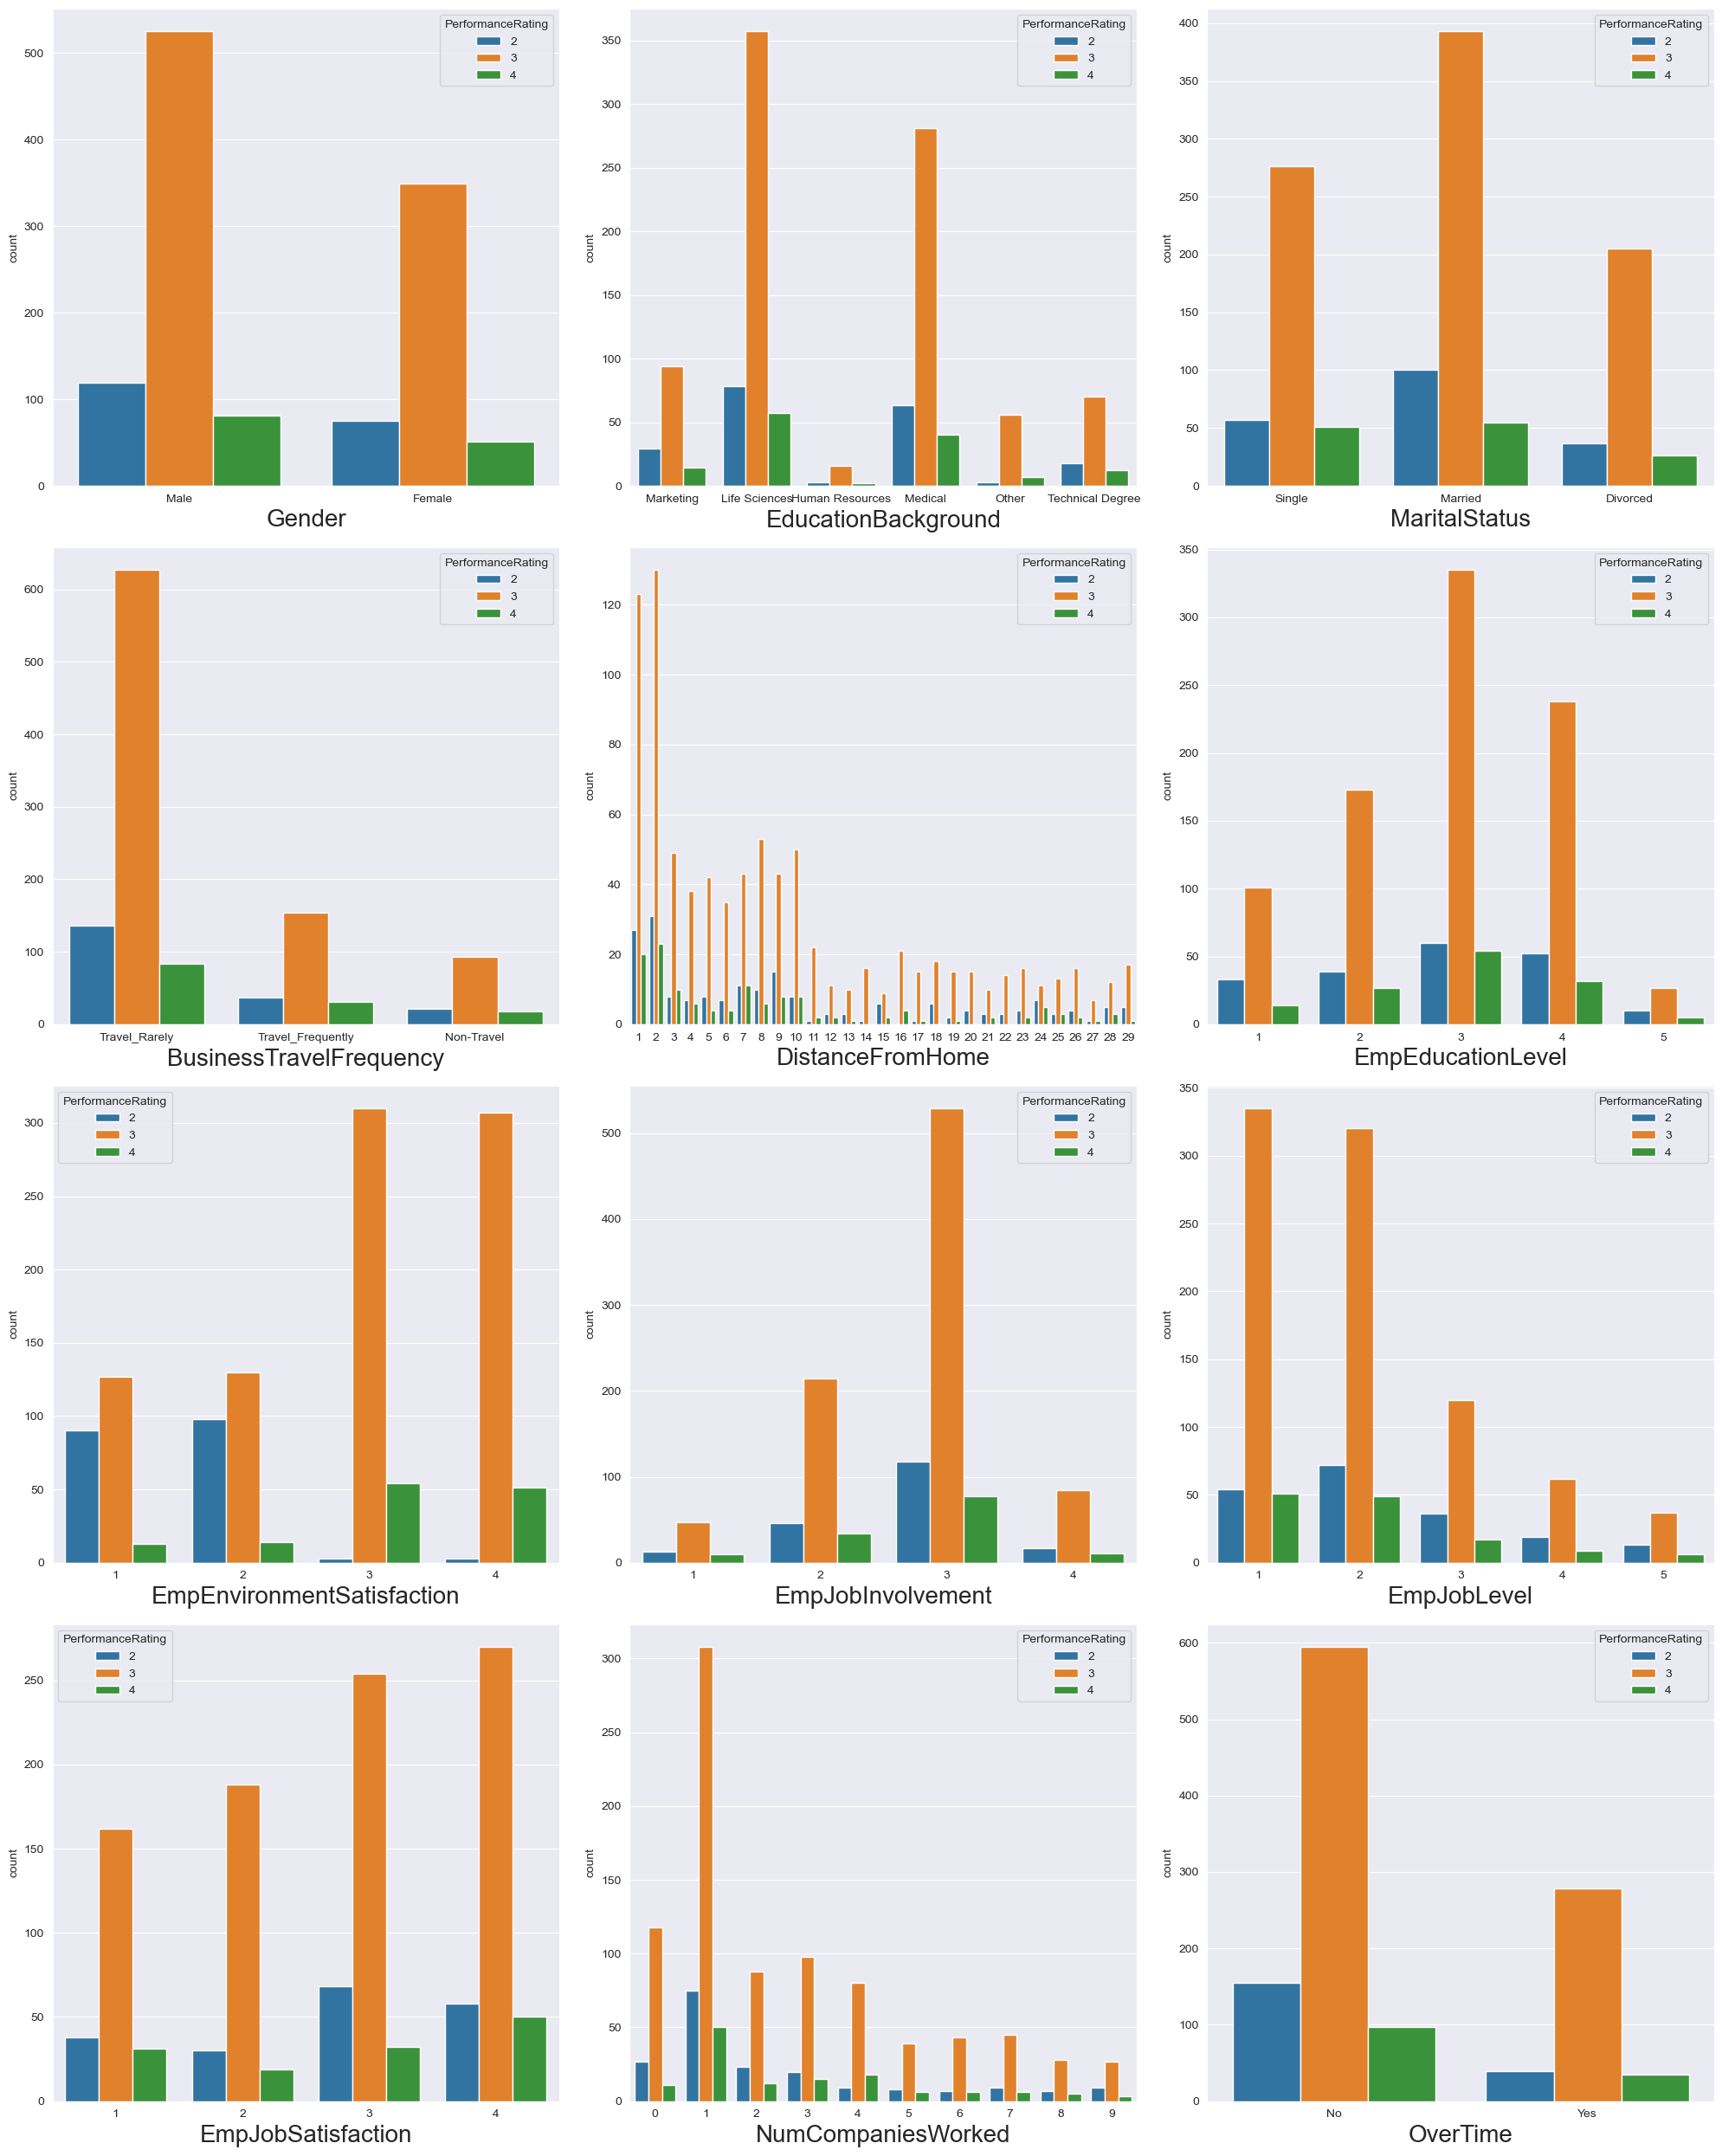

In [8]:
#USE SUBPLOT TO PLOTS MULTIPLE FEATURE
count = data[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] # making lsit of next 12 feature

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in count: # iteration of columns / acessing the columns from count 
    if plotno<=13:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count[column], hue = data['PerformanceRating']) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


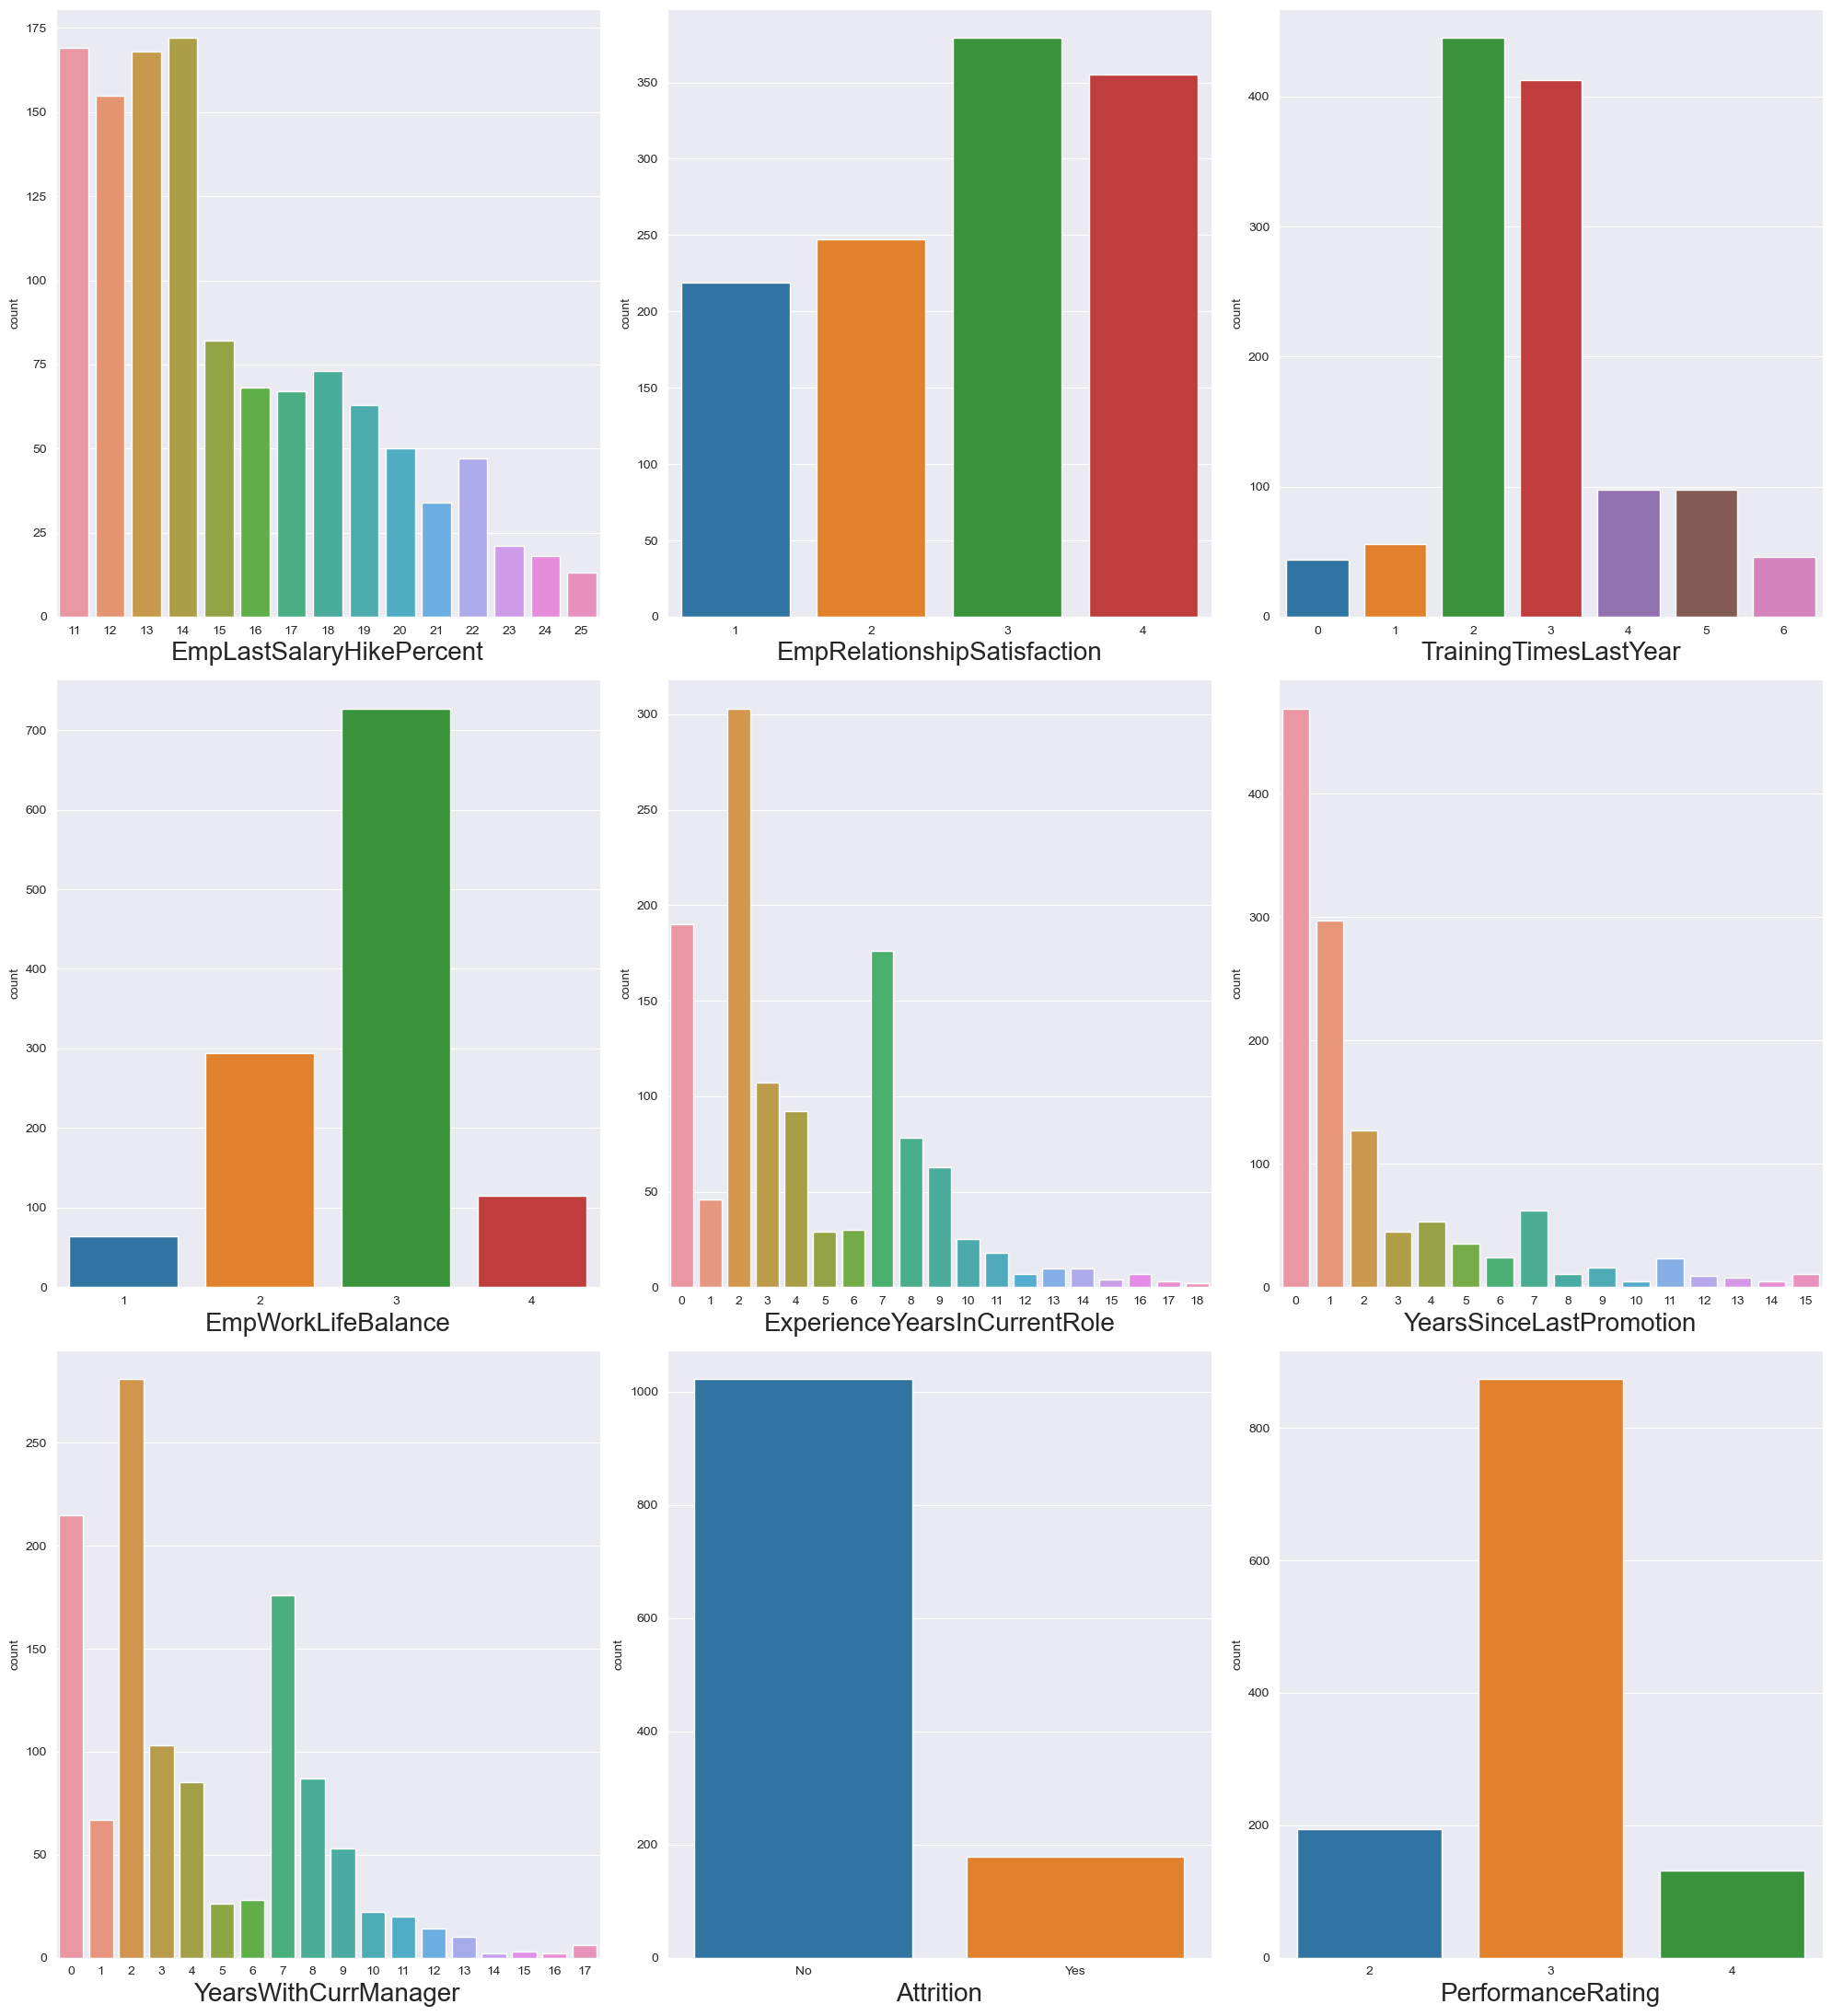

In [9]:
count2 = data[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition', 
               'PerformanceRating']]  #Making next feature list to plot the graph

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in count2: # iteration of columns / acessing the columns from count 
    if plotno<=10:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count2[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

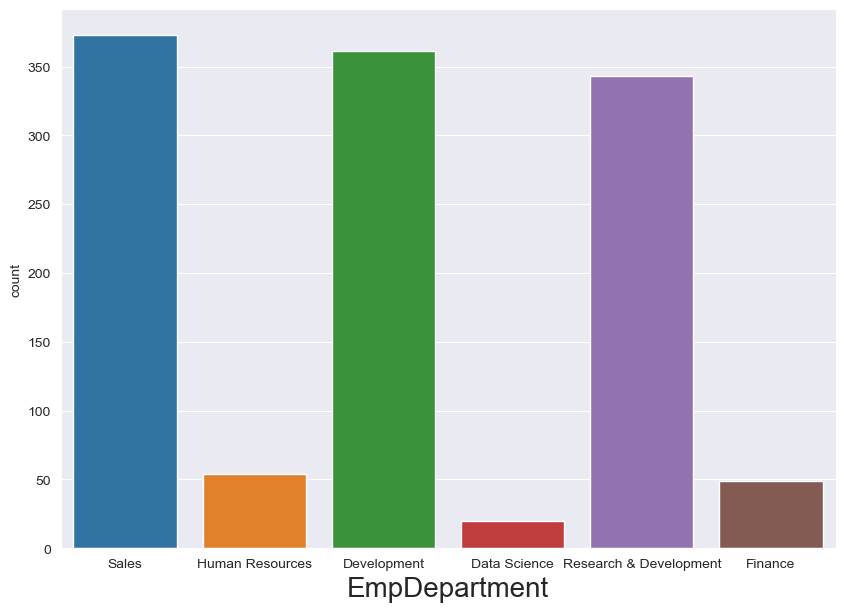

In [10]:
#Employee Department
plt.figure(figsize=(10,7))
sns.countplot(x = 'EmpDepartment', data =data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.show()

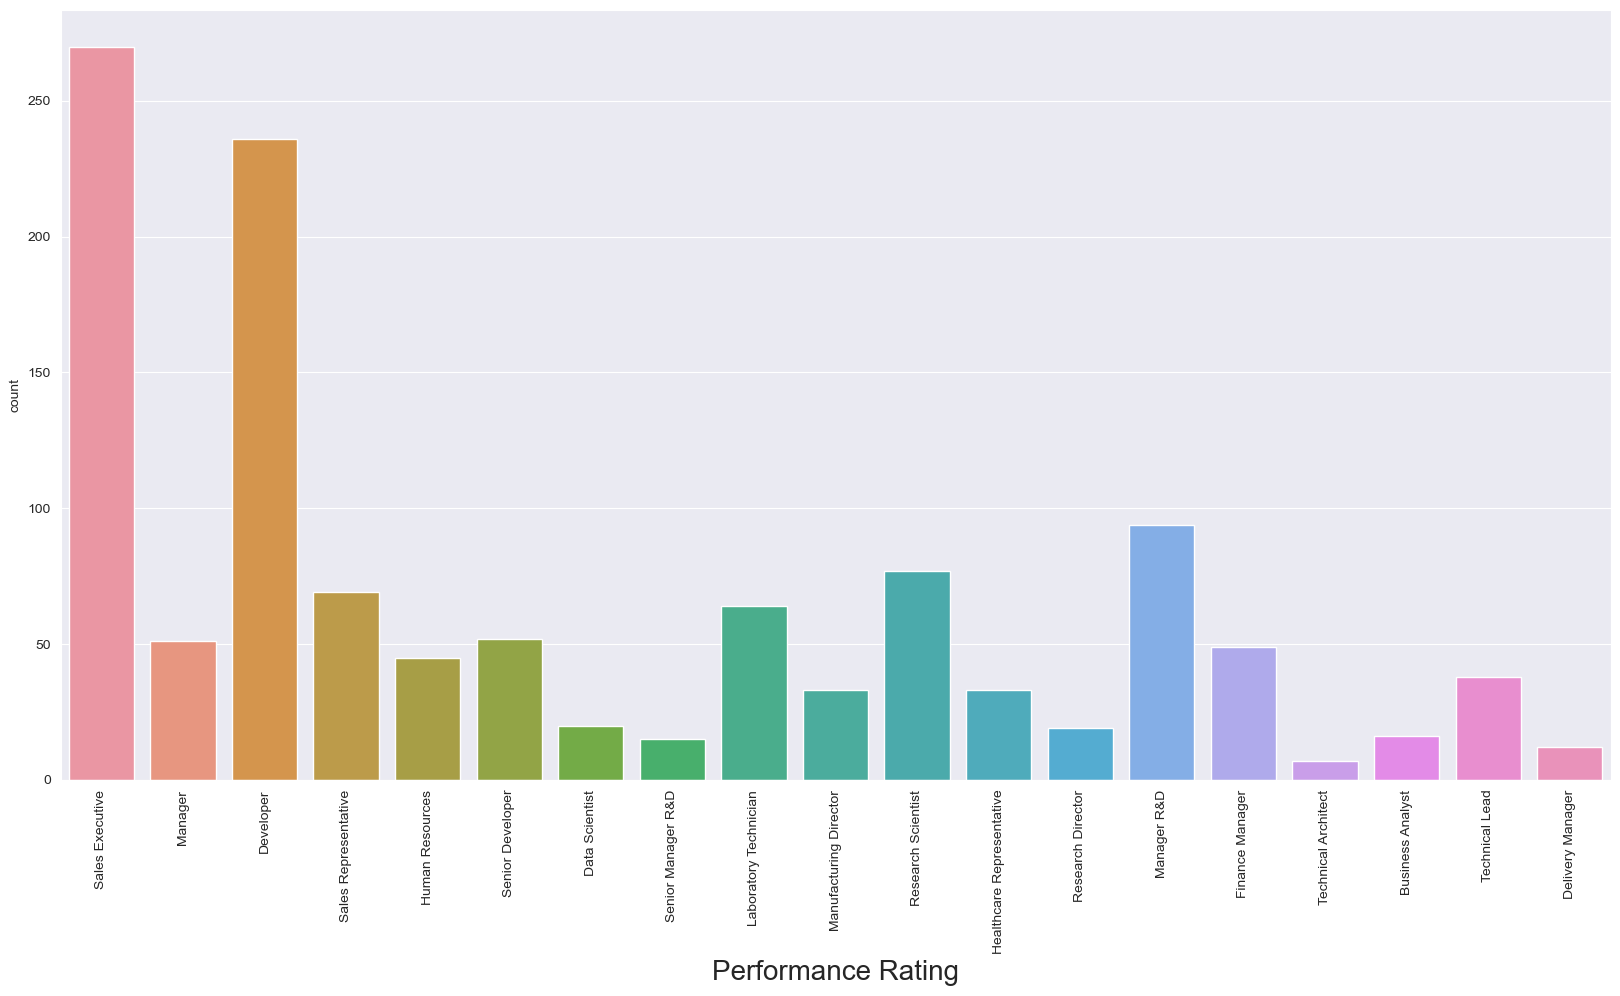

In [11]:
#Employee Job Role
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole', data=data)
plt.xticks(rotation='vertical')
plt.xlabel('Performance Rating',fontsize=20)
plt.show()

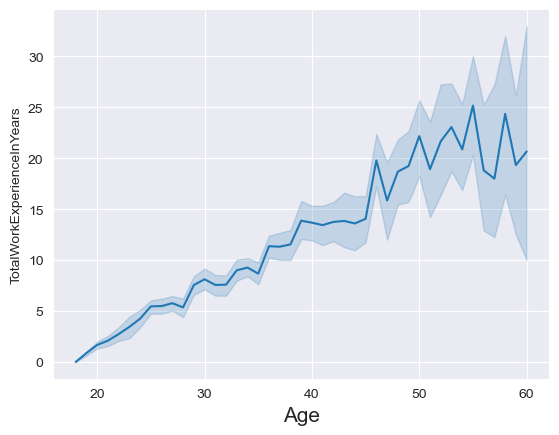

In [19]:
#1.Relation Between age & Experience Years At This Company

sns.lineplot(x='Age',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('Age',fontsize=15)
plt.show()

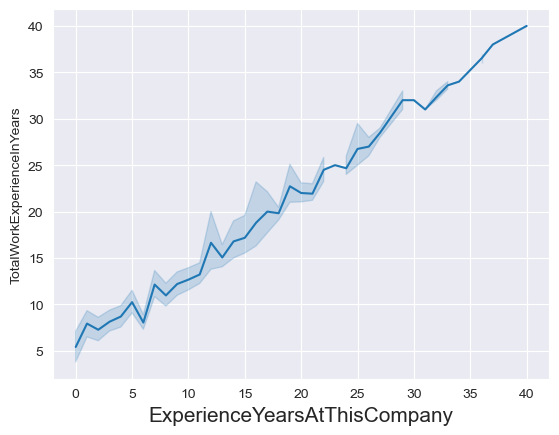

In [13]:
#2.Relation Between experiance year at this company & total work experiance

sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=15)
plt.show()

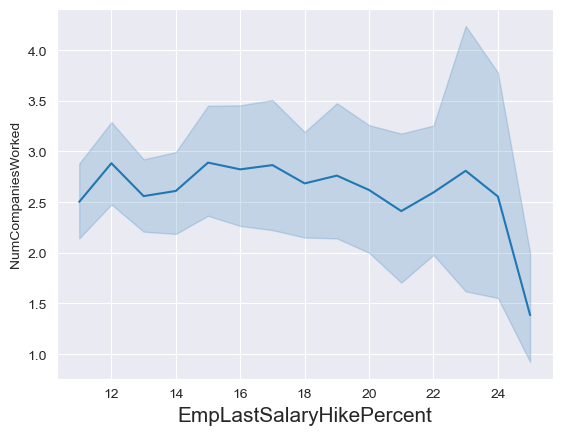

In [14]:
#3.Relation between Employee last salary hike and number of company worked

sns.lineplot(x='EmpLastSalaryHikePercent',y='NumCompaniesWorked',data=data)
plt.xlabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

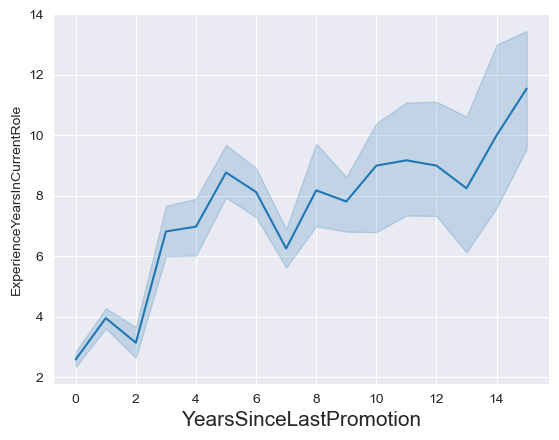

In [15]:
#4.Relation between Years Since Last Promotion and Experience Years In CurrentRole

sns.lineplot(x='YearsSinceLastPromotion',y='ExperienceYearsInCurrentRole',data=data)
plt.xlabel('YearsSinceLastPromotion',fontsize=15)
plt.show()

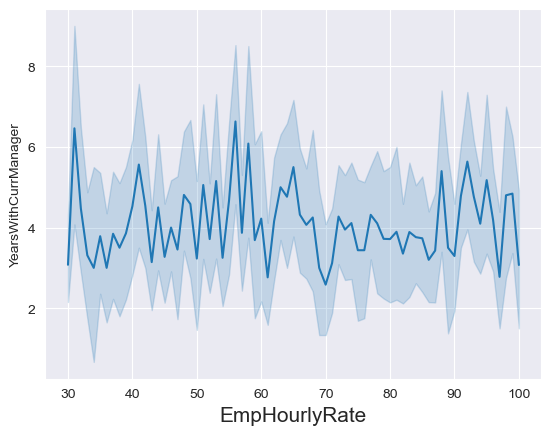

In [16]:
#5.Relation between Employee Hourly Rate and Years With Current Manager

sns.lineplot(x='EmpHourlyRate',y='YearsWithCurrManager',data=data)
plt.xlabel('EmpHourlyRate',fontsize=15)
plt.show()

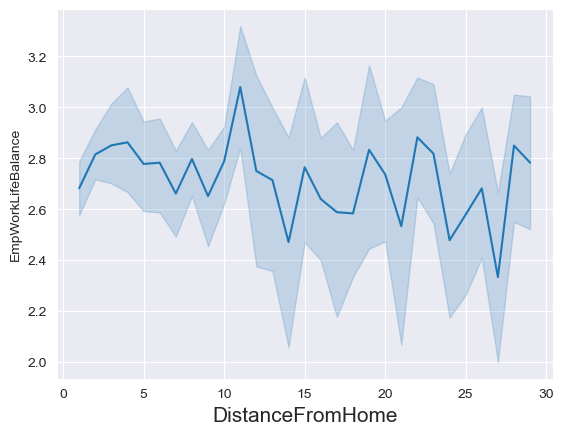

In [20]:
#6.Relation between Distance From Home and Employee Last Salary Hike Percent

sns.lineplot(x='DistanceFromHome',y='EmpWorkLifeBalance',data=data)
plt.xlabel('DistanceFromHome',fontsize=15)
plt.show()

In [21]:
#ANALYSIS ON CATEGORICAL AND DISCERETE FEATURE
#CREATE A NEW DATAFRAME FOR CATEGORICAL FEATURES.
categorical = []  # Create empty list to store the feature
for column in data.columns:
    if data[column].dtype == object:
        categorical.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

EmpNumber : ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


In [ ]:
# categorical  # All categorical features 

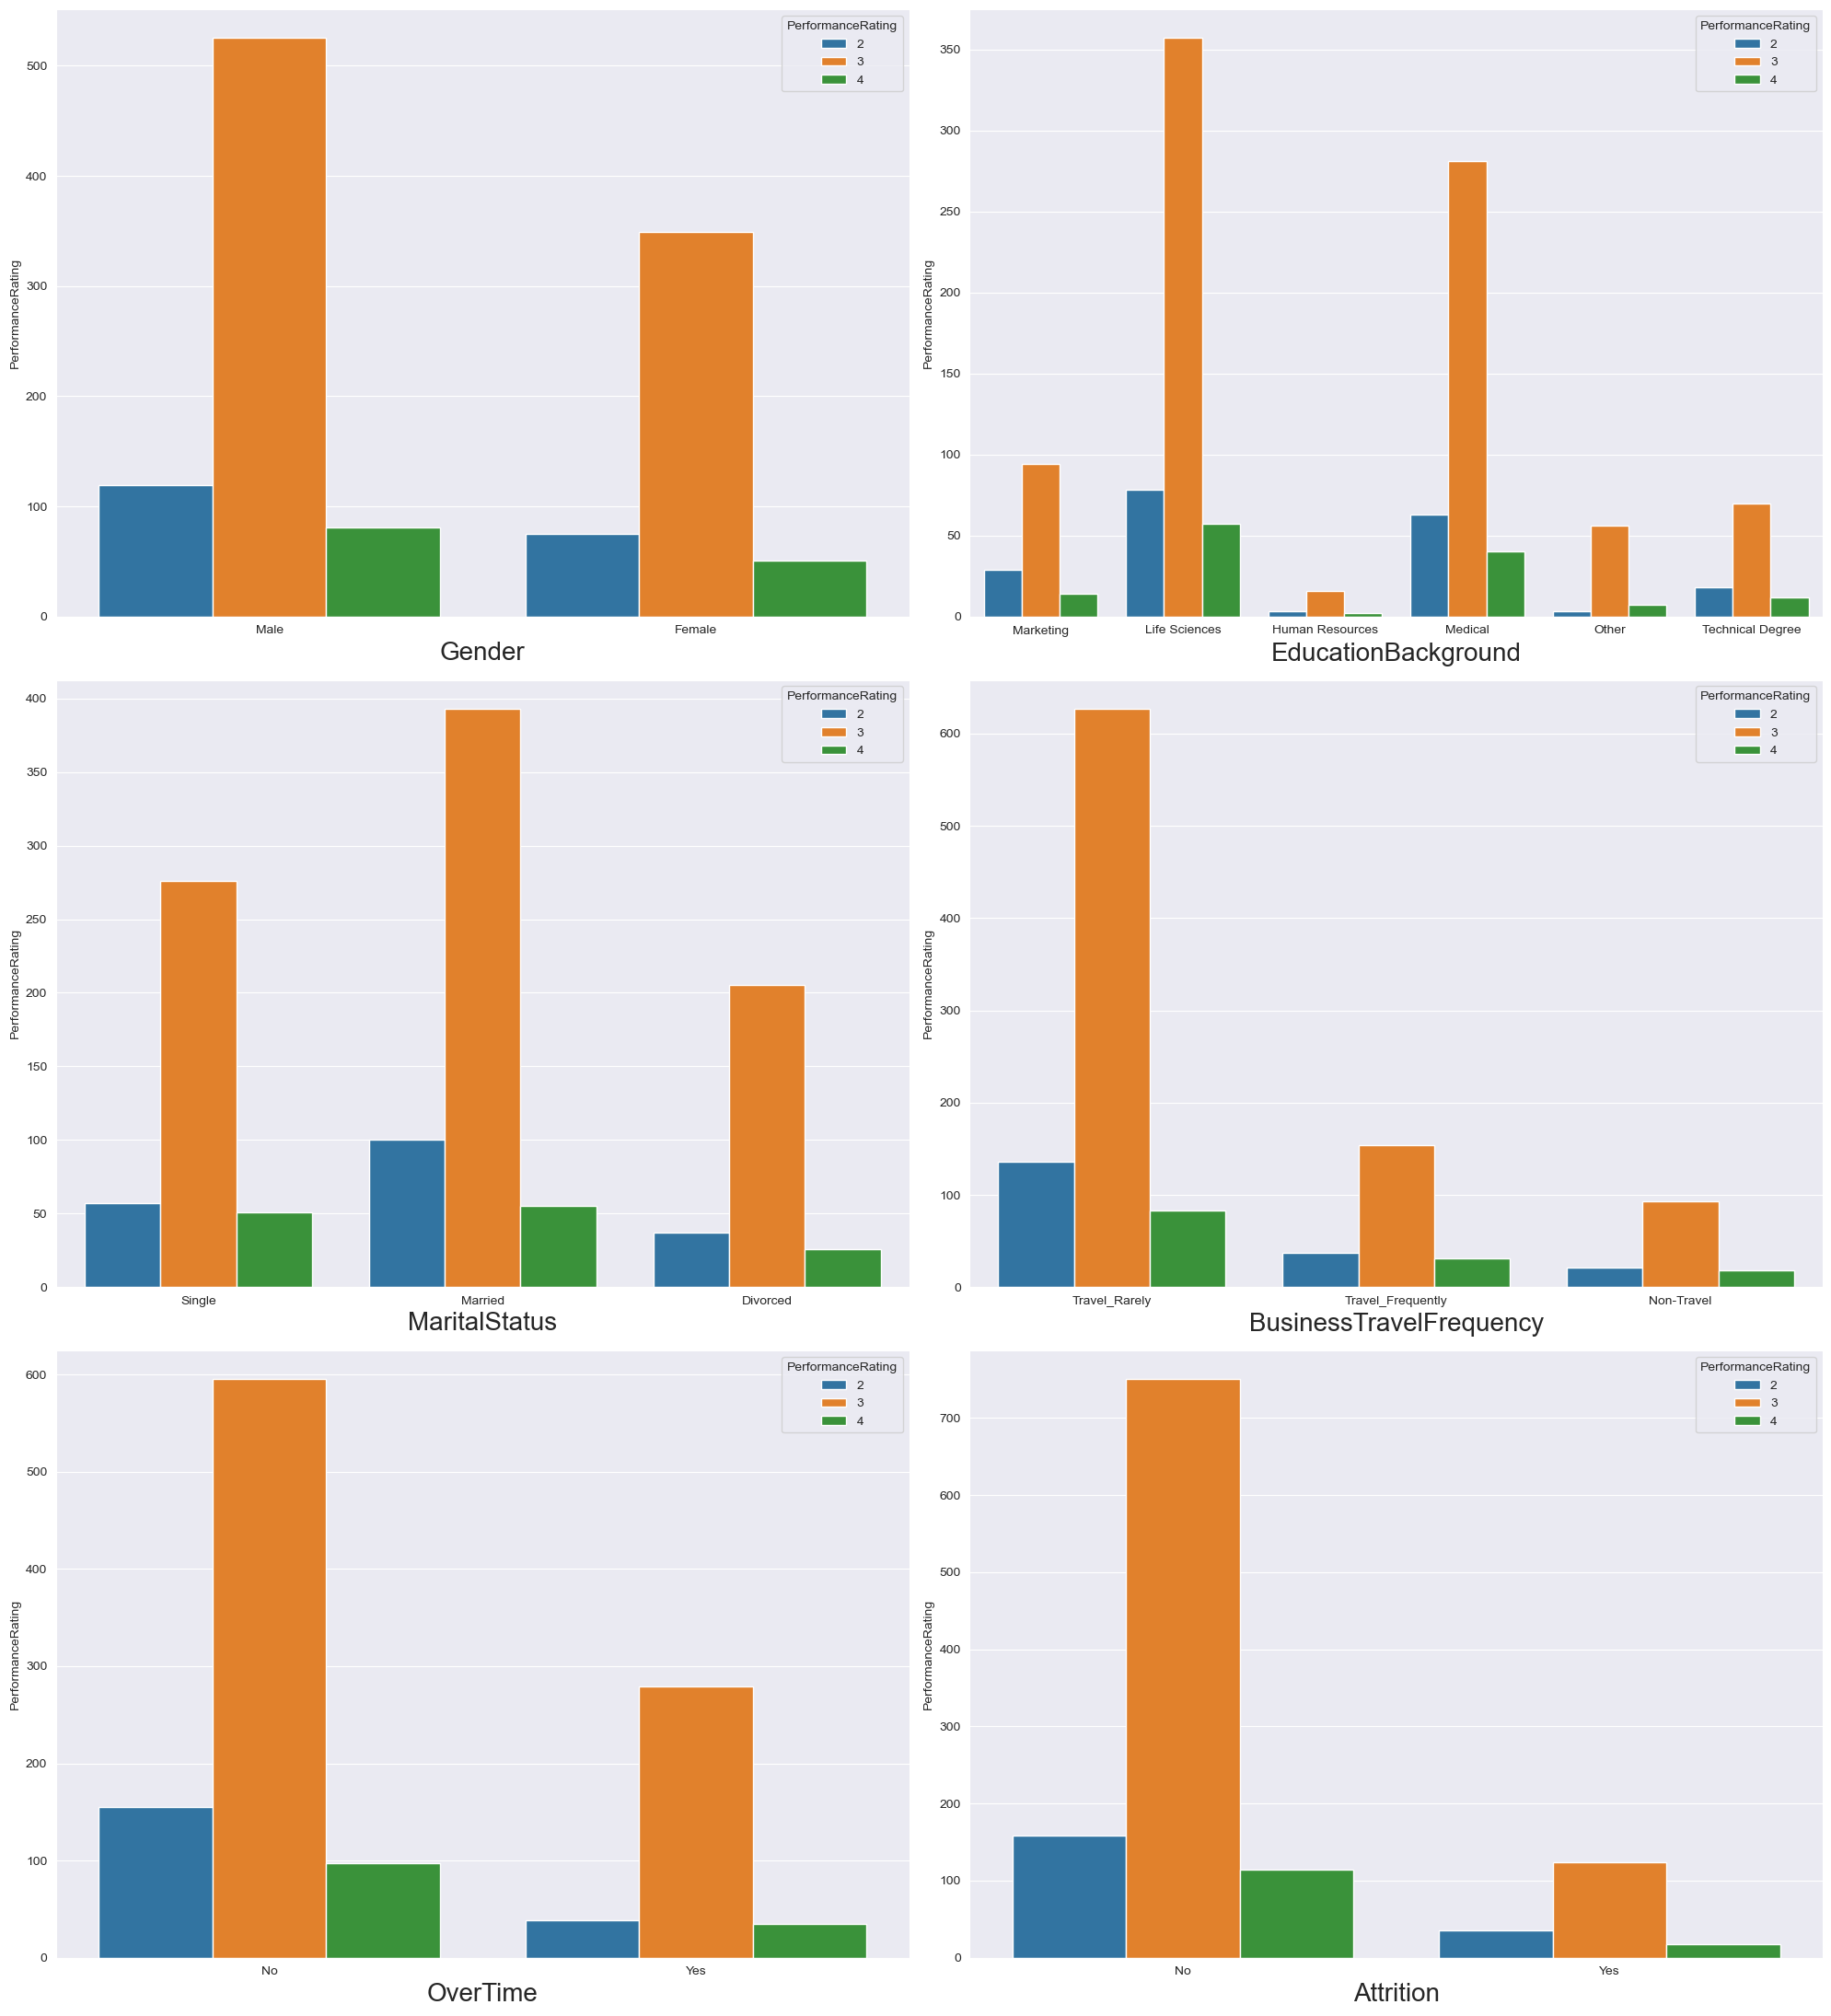

In [22]:
# Make a list of categorical feature and use sub plot to plot multiple feature
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in categorical_col: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

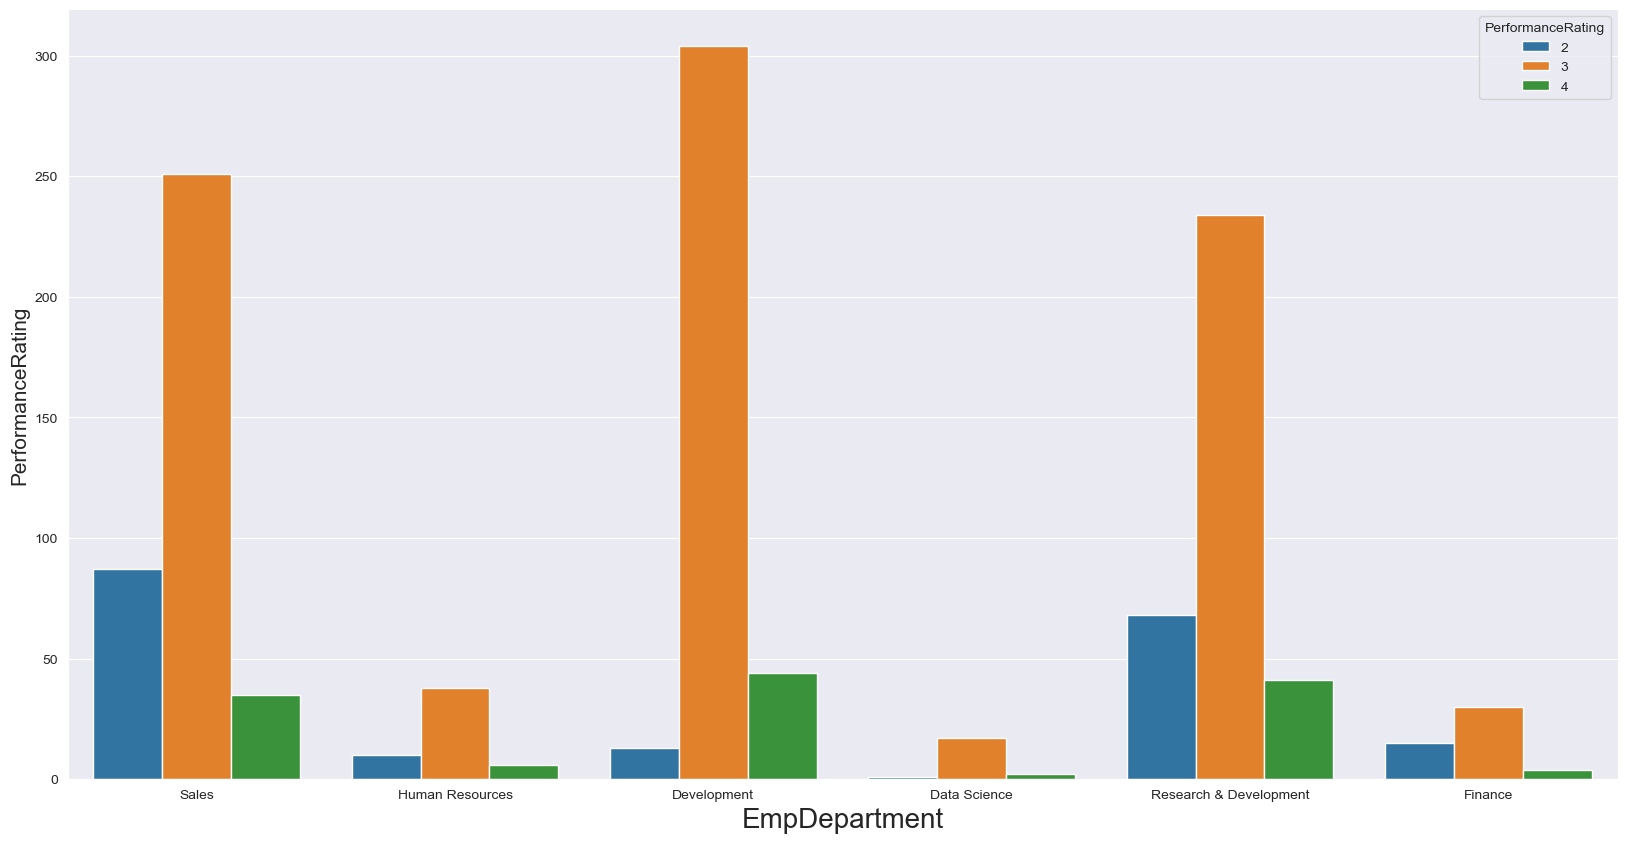

In [23]:
#Relationship between employee department and performance rating

plt.figure(figsize=(20,10))
sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

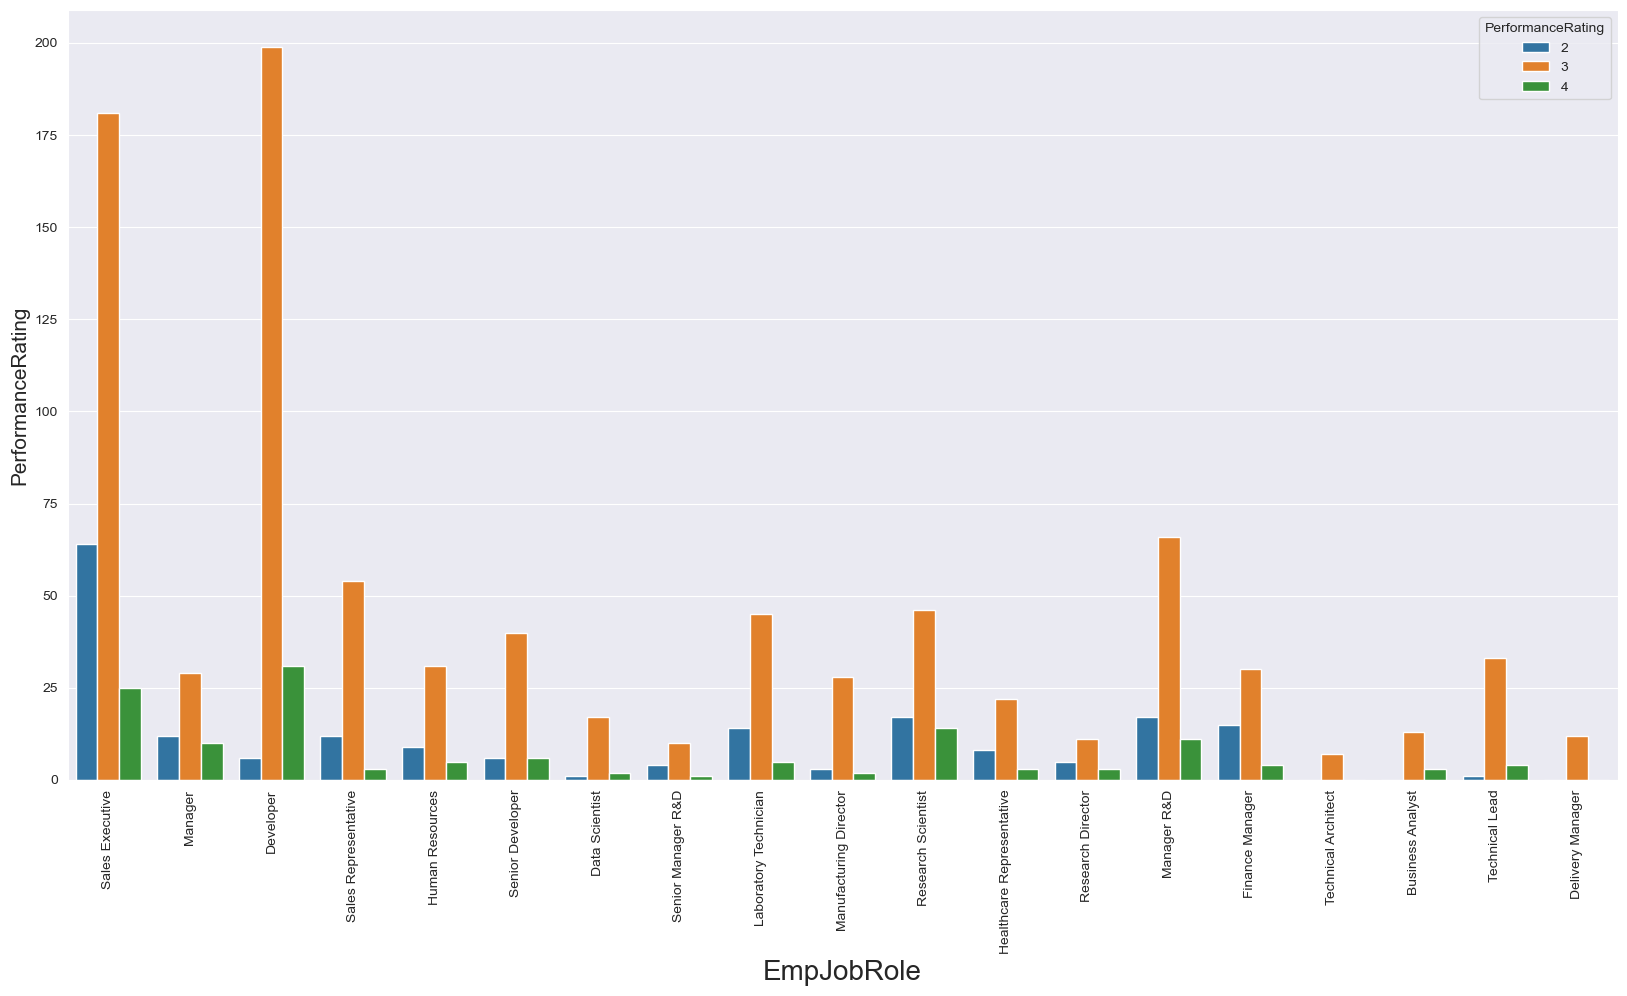

In [24]:
#14.Relationship between employee job role and performance rating

plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole',hue=data.PerformanceRating,data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

In [25]:
#CREATE NEW DATAFRMAE FOR NUMERICAL FEATURES:
numerical_col = []
for column in data.columns:
    if data[column].dtype == "int64":
        data[column].unique()   # for continuos features we use unique>=10
        numerical_col.append(column)
numerical_col  # All numerical features

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

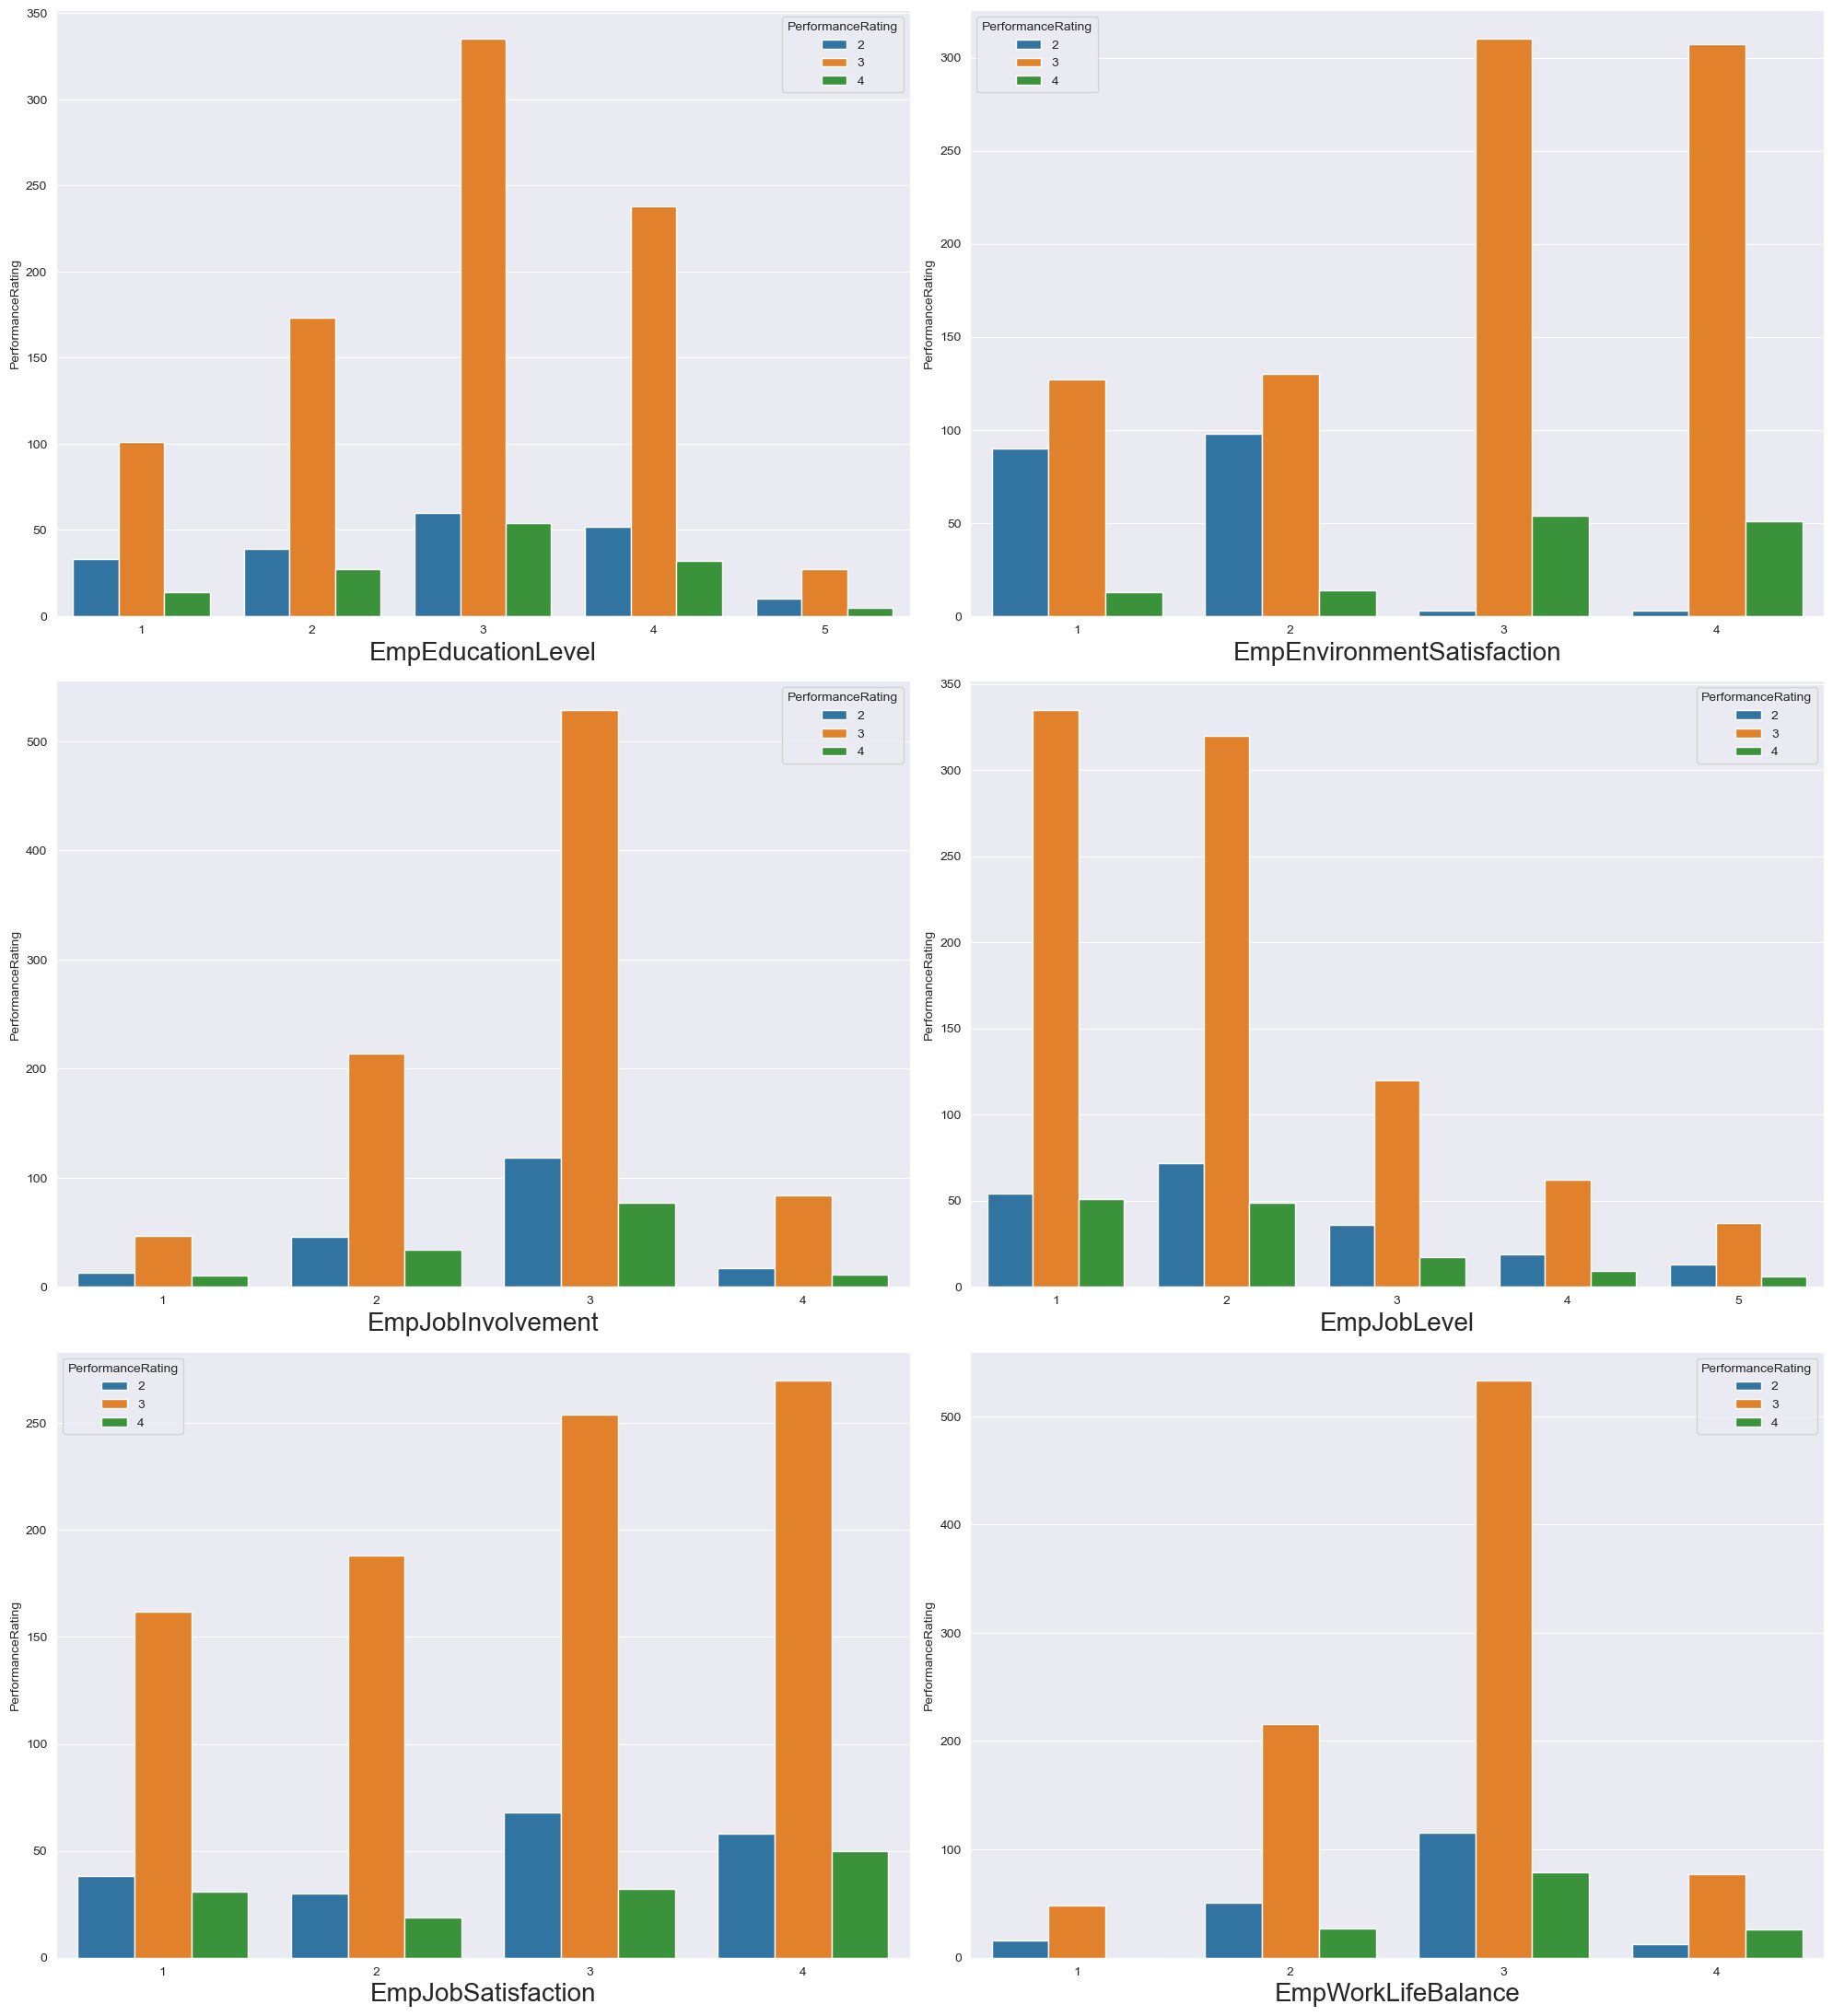

In [26]:
numerical = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=numerical[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

MULTIVARIATE ANALYSIS
Checking the relationship between two features with respect to target features
PLOT USED:
Line plot: A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.
Barplot: It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

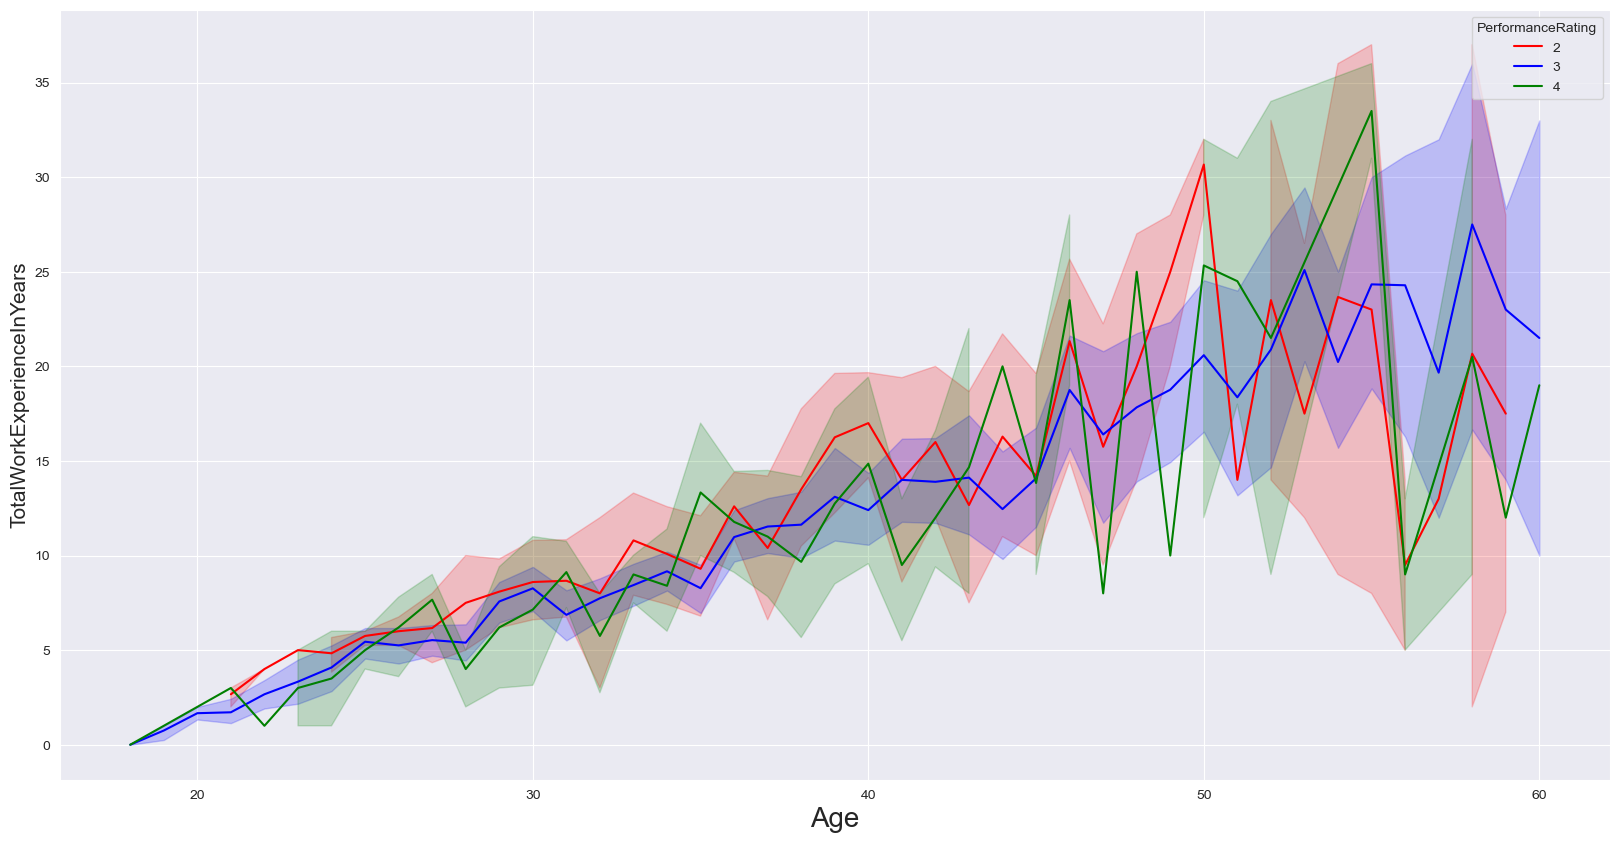

In [50]:
#1.Check the relationship between Age & Total work experiance with respect to target feature

plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',hue=data.PerformanceRating, data=data,palette=['red', 'blue','green'])
plt.xlabel('Age',fontsize=20)
plt.ylabel('TotalWorkExperienceInYears',fontsize=15)
plt.show()


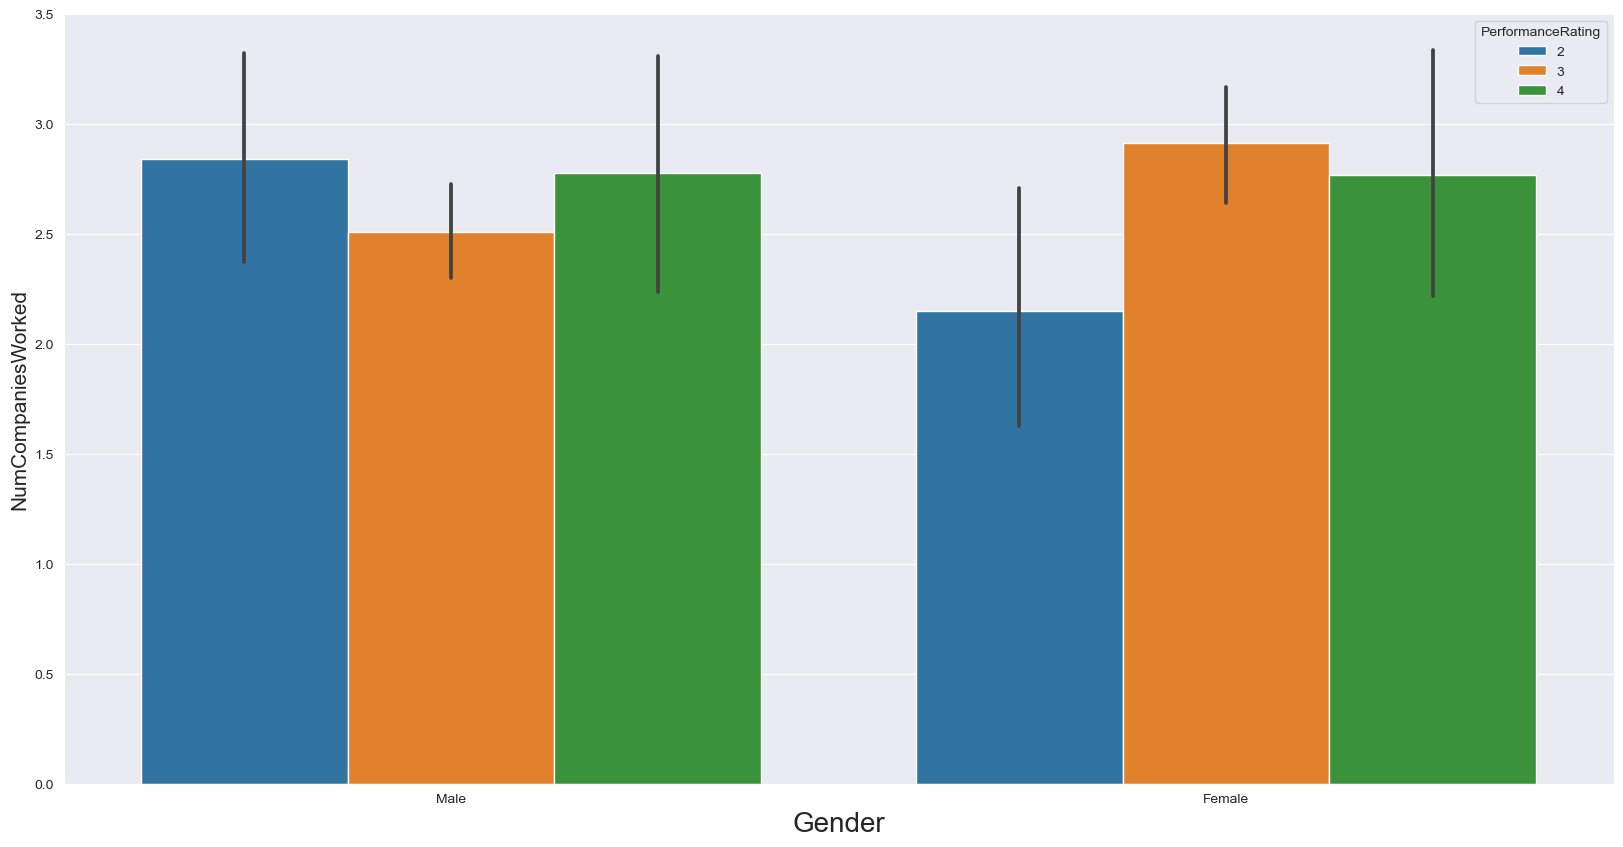

In [51]:
#2.Check the relationship between Gender & Number Companies Worked with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

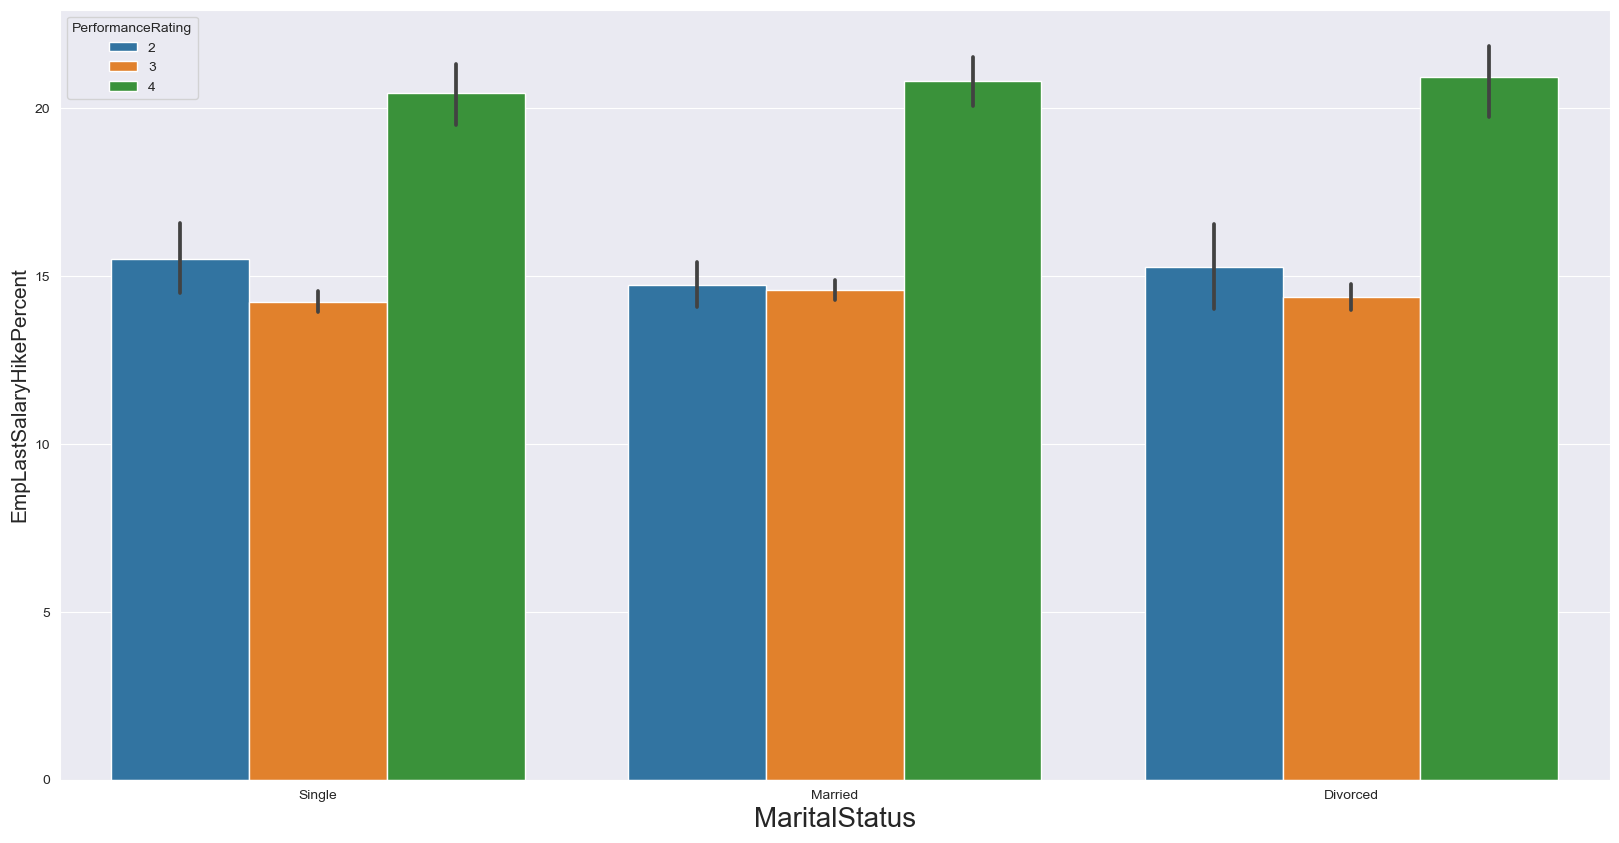

In [52]:
#3.Check the relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=data.PerformanceRating,data=data)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

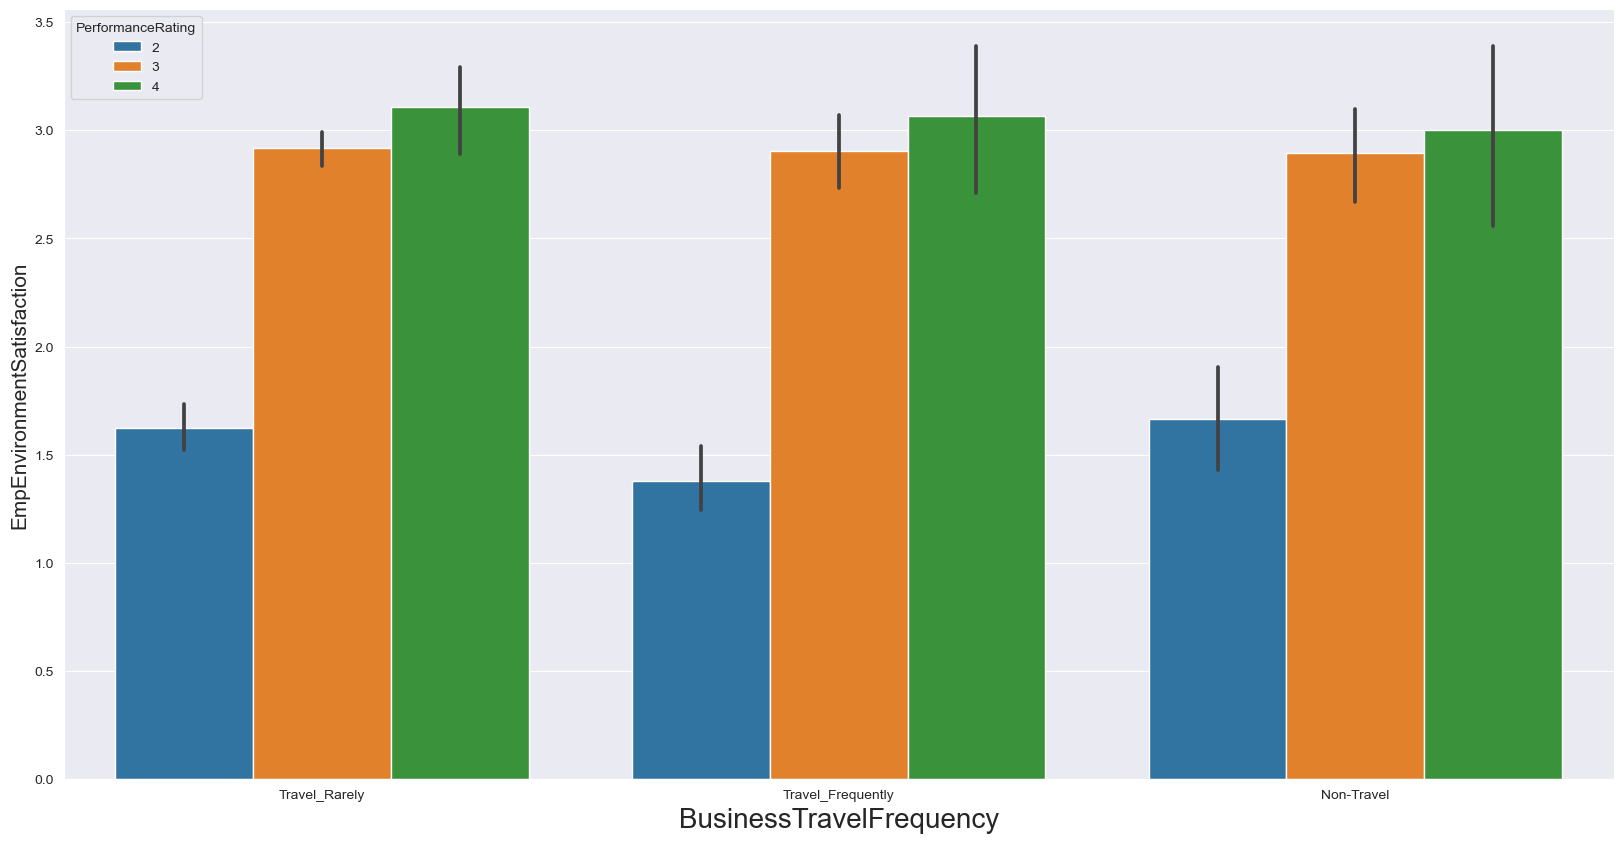

In [53]:
#4.Check the relationship between BusinessTravelFrequency & EmpEnvironmentSatisfaction with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='BusinessTravelFrequency',y='EmpEnvironmentSatisfaction',hue=data.PerformanceRating,data=data)
plt.xlabel('BusinessTravelFrequency',fontsize=20)
plt.ylabel('EmpEnvironmentSatisfaction',fontsize=15)
plt.show()

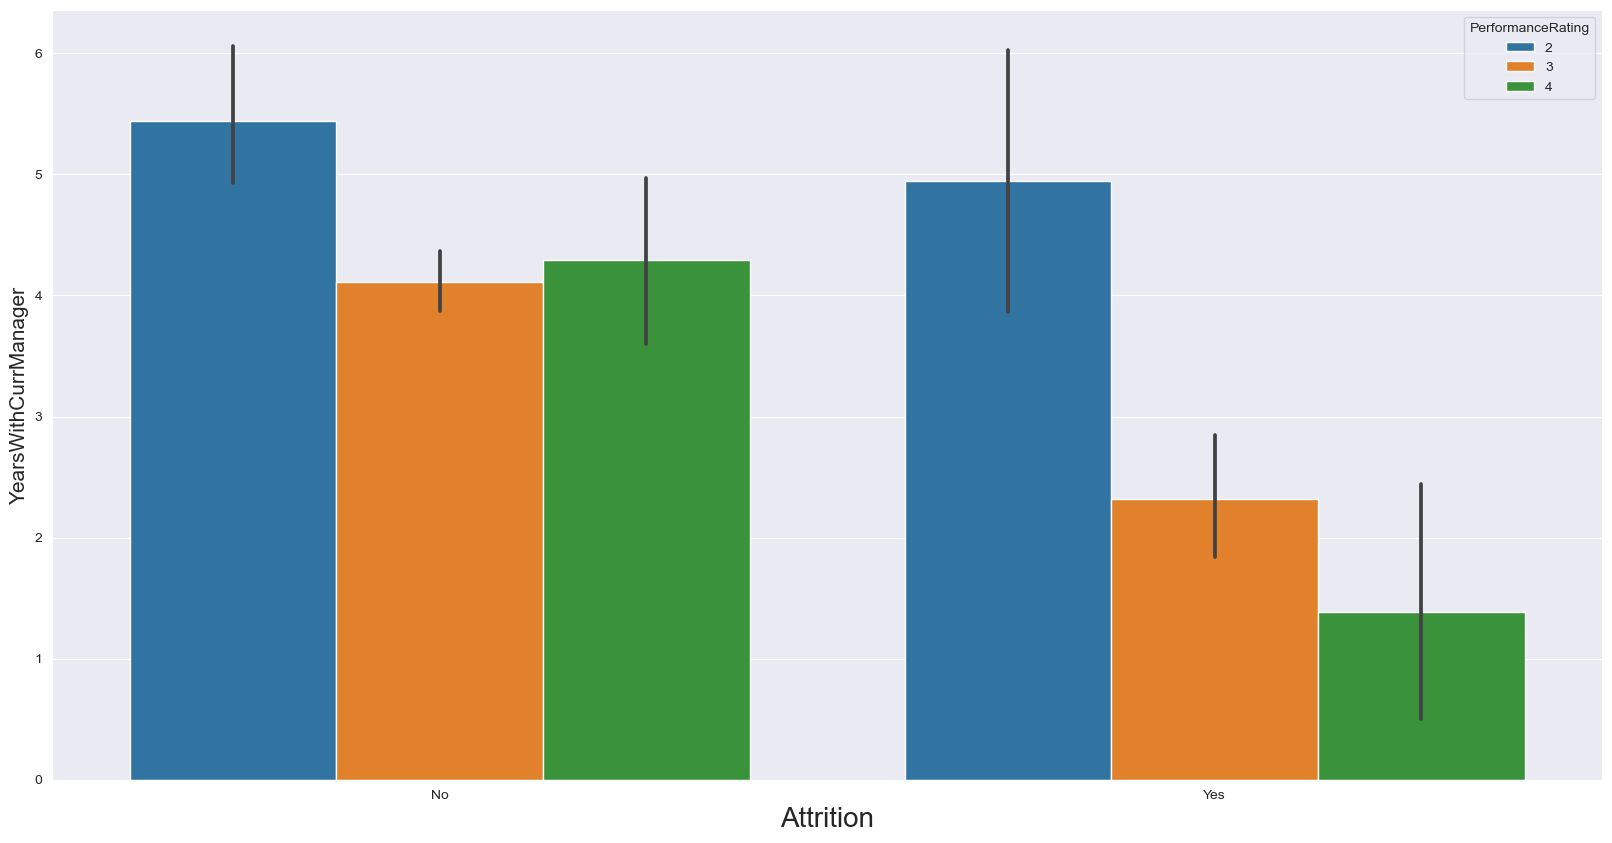

In [54]:
#5.Check the relationship between Attrition & YearsWithCurrManager with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('YearsWithCurrManager',fontsize=15)
plt.show()

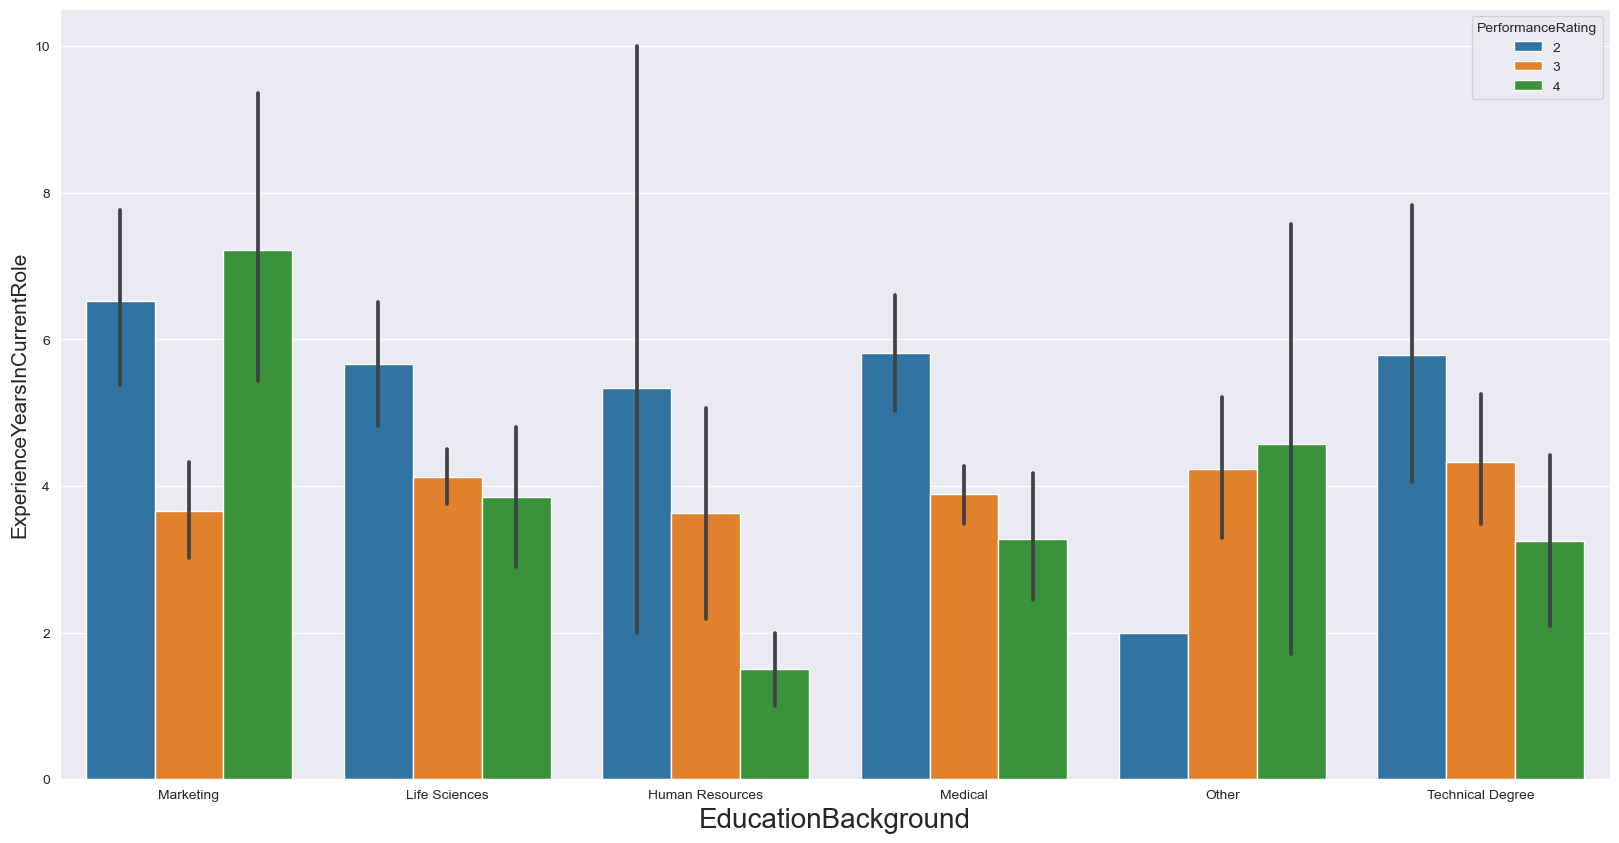

In [55]:
#6.Check the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=data.PerformanceRating,data=data)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()


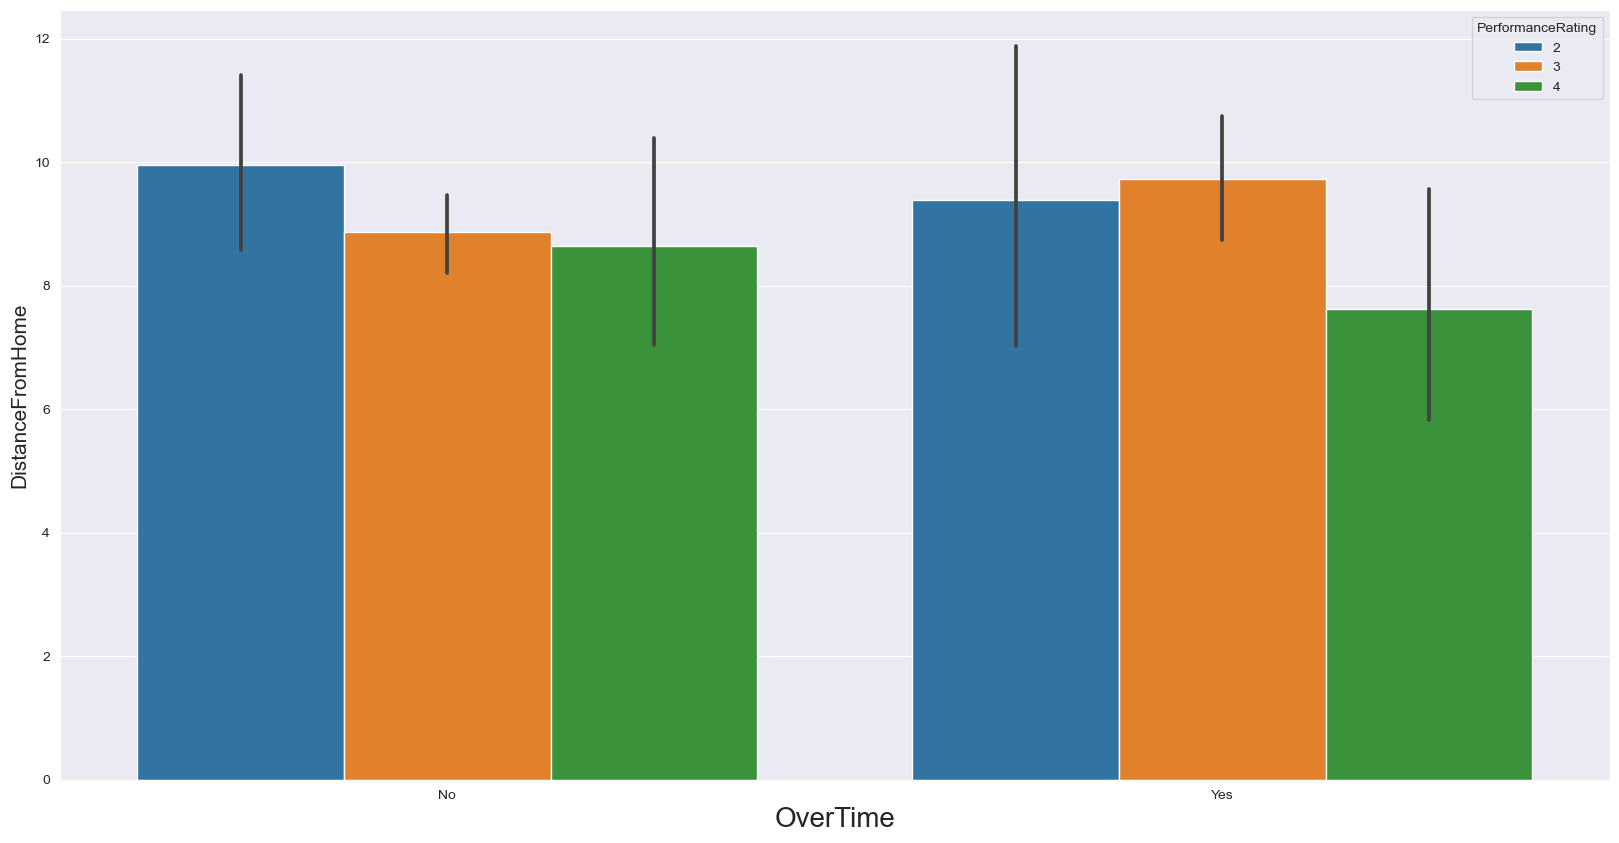

In [56]:
#7.Check the relationship between OverTime & DistanceFromHome with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='OverTime',y='DistanceFromHome',hue=data.PerformanceRating,data=data)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('DistanceFromHome',fontsize=15)
plt.show()

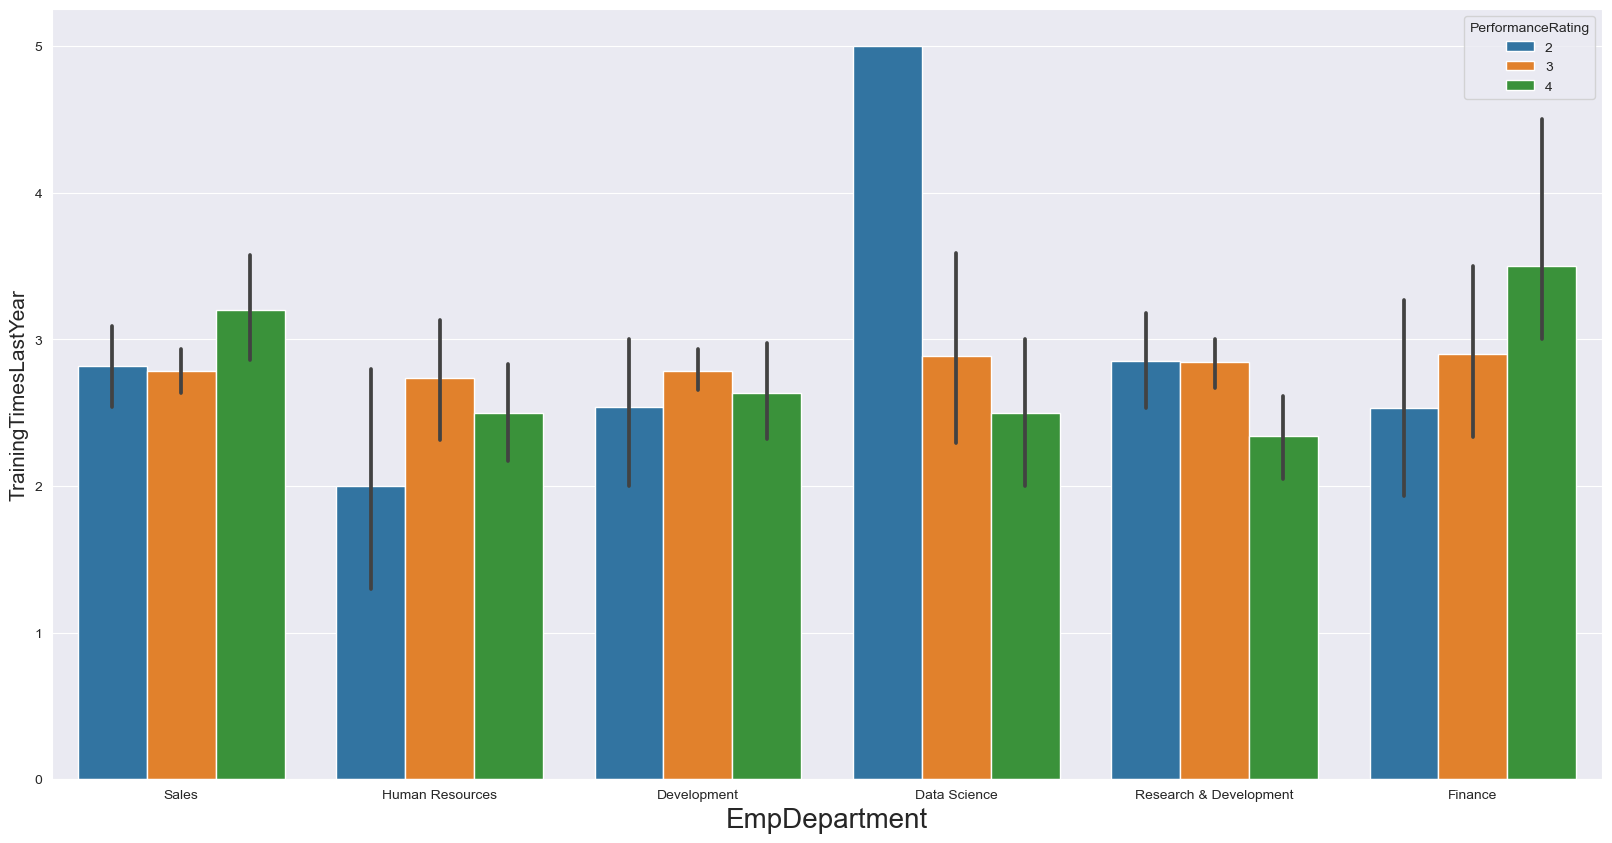

In [57]:
#8.Check the relationship between EmpDepartment & TrainingTimesLastYear with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

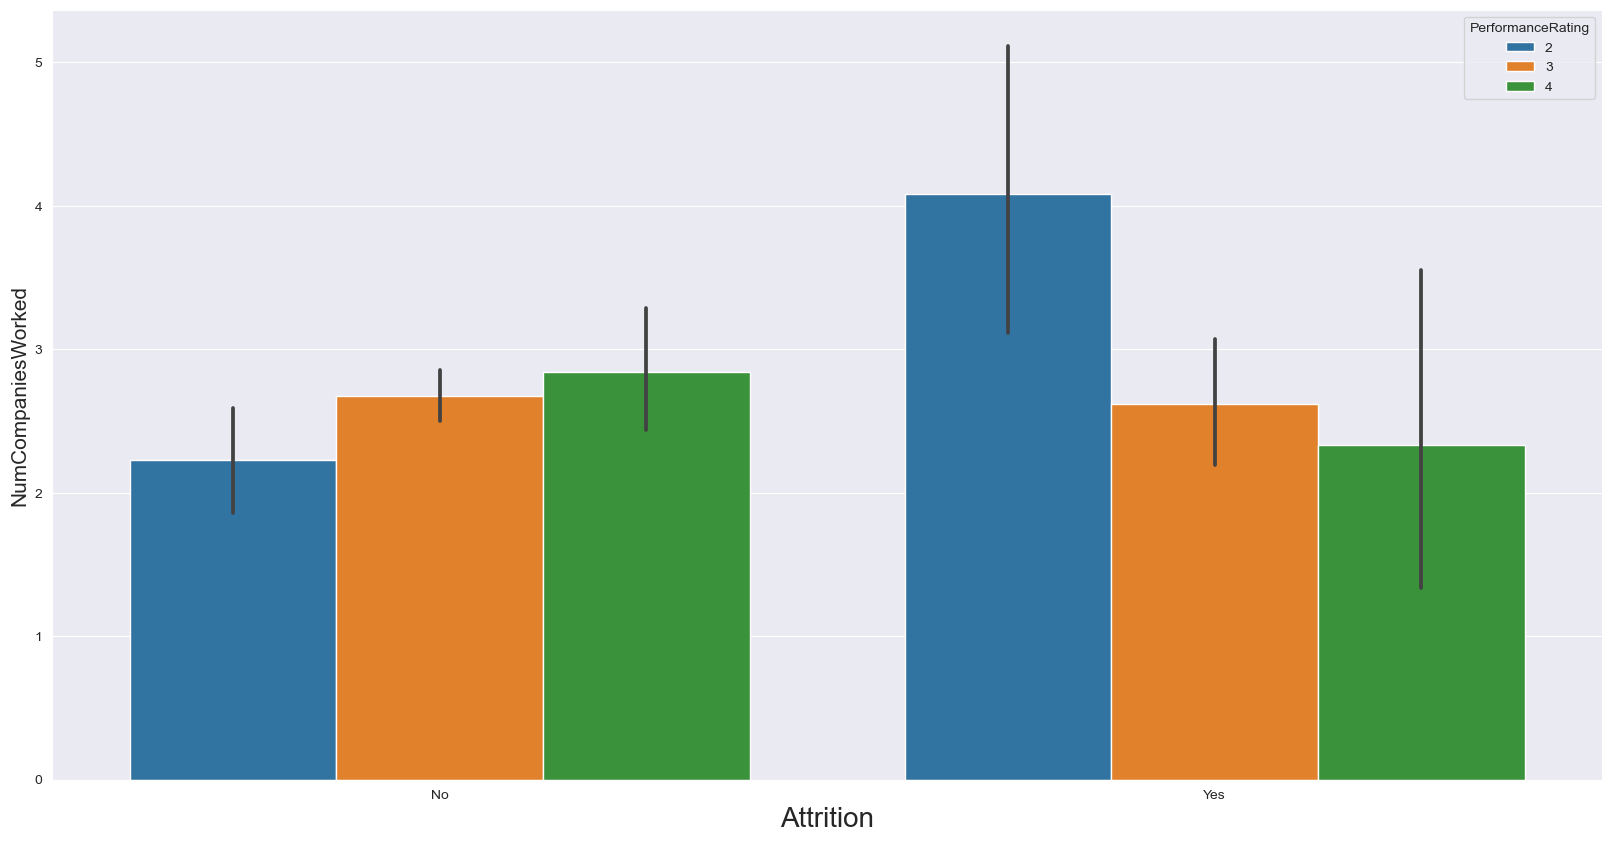

In [58]:
#Check the relationship between Attrition & NumCompaniesWorked with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()